#  PARKINSON DISEASE PREDICTION USING MACHINE LEARNING



Data Preparation and Preprocessing

This part focuses on loading and preparing the dataset and performing necessary preprocessing steps. It includes:


* Importing libraries
* Loading the dataset

* Separating features and labels

* Scaling features using Min-Max scaling
* Splitting the data into training and testing sets





In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import ADASYN

# Load the Parkinson's disease dataset
df = pd.read_csv('parkinsons.data')

# Separate features (X) and labels (Y)
features = df.loc[:, df.columns != 'status'].values[:, 1:]
labels = df.loc[:, 'status'].values

# Scale features using Min-Max scaling
scaler = MinMaxScaler((-1, 1))
X = scaler.fit_transform(features)
Y = labels

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7)


Model Training

This part focuses on training the XGBoost model with ADASYN for handling class imbalance. It includes:



* Importing necessary libraries, including XGBoost and ADASYN
* Applying ADASYN for oversampling
* Creating and training the XGBoost model





In [ ]:
from xgboost import XGBClassifier
from imblearn.over_sampling import ADASYN

# Apply ADASYN to handle class imbalance
adasyn = ADASYN(sampling_strategy='minority', random_state=1)
X_resampled, Y_resampled = adasyn.fit_resample(X_train, Y_train)

# Create an XGBoost model
model = XGBClassifier(eval_metric='logloss', use_label_encoder=False, objective='binary:logistic', n_estimators=100, max_depth=3)

# Train the model on the resampled data
model.fit(X_resampled, Y_resampled)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

Model Evaluation and Prediction

This part includes evaluating the model's performance on the test data and providing a function for making predictions.


In [ ]:
# Apply ADASYN to handle class imbalance
adasyn = ADASYN(sampling_strategy='minority', random_state=1)
X_resampled, Y_resampled = adasyn.fit_resample(X_train, Y_train)

# Create an XGBoost model
model = XGBClassifier(eval_metric='logloss', use_label_encoder=False, objective='binary:logistic', n_estimators=100, max_depth=3)

# Train the model on the resampled data
model.fit(X_resampled, Y_resampled)

# Calculate accuracy, precision, recall, and F1 score on the test data
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred) * 100
precision = precision_score(Y_test, Y_pred) * 100
recall = recall_score(Y_test, Y_pred) * 100
f1 = f1_score(Y_test, Y_pred) * 100

# Print the evaluation metrics
print("Accuracy on Test Data: {:.2f}%".format(accuracy))
print("Precision: {:.2f}%".format(precision))
print("Recall: {:.2f}%".format(recall))
print("F1 Score: {:.2f}%".format(f1))

# Define a function to predict if a person has Parkinson's disease
def predict_parkinsons(input_data):
    # Standardize the input data
    input_data_std = scaler.transform(np.array(input_data).reshape(1, -1))

    # Make a prediction
    prediction = model.predict(input_data_std)

    # Return the prediction
    return "The person has Parkinson's disease." if prediction == 1 else "The person does not have Parkinson's disease."
# Example input data for prediction
input_data = [198.38300,215.20300,193.10400,0.00212,0.00001,0.00113,0.00135,0.00339,0.01263,0.11100,0.00640,0.00825,0.00951,0.01919,0.00119,30.77500,0.465946,0.738703,-7.067931,0.175181,1.512275,0.096320]

# Use the function to make a prediction
result = predict_parkinsons(input_data)
print(result)


Accuracy on Test Data: 97.44%
Precision: 100.00%
Recall: 96.88%
F1 Score: 98.41%
The person does not have Parkinson's disease.


bar chart


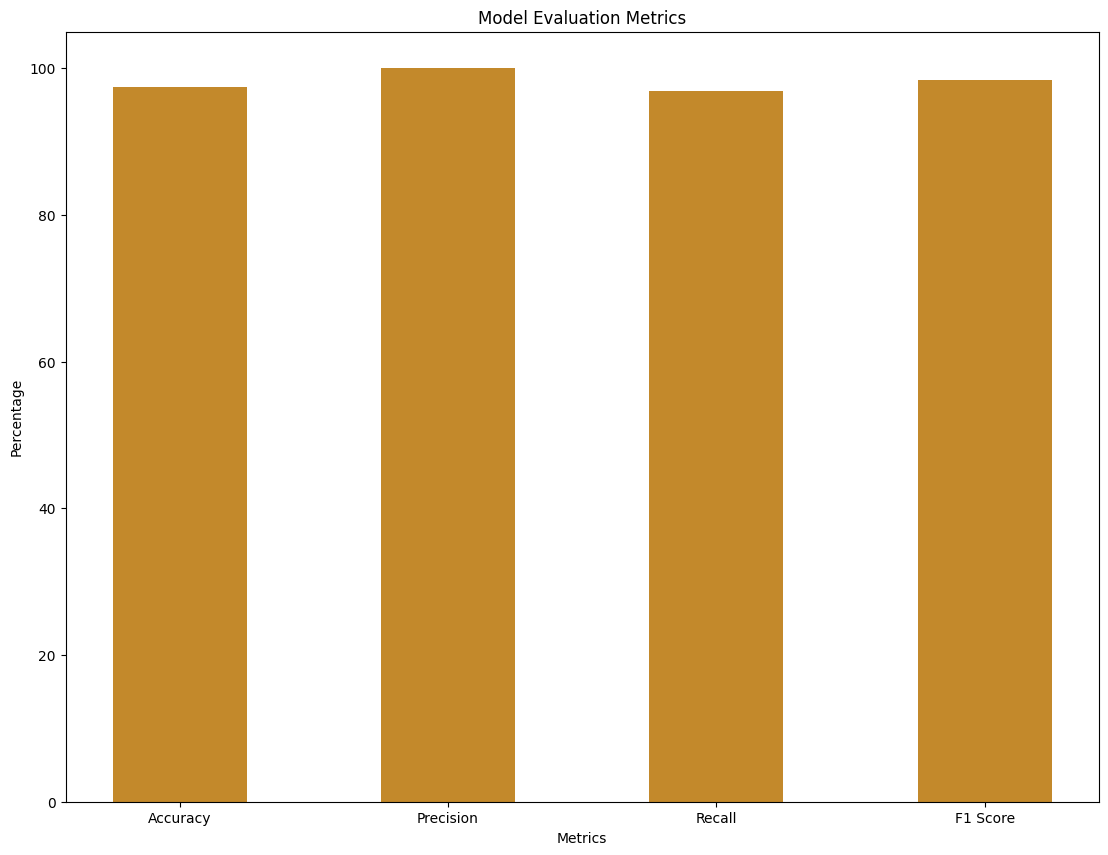

In [ ]:
import matplotlib.pyplot as plt

# Example data
categories = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [97.44, 100, 96.88, 98.41]

# Set the color and bar width
bar_color = '#c3892b'
bar_width = 0.5# Adjust the width as needed

# Create a bar chart with specified color, size, and width
plt.figure(figsize=(13.33, 10))  # Adjust size to 1024x768 (aspect ratio 4:3)
plt.bar(categories, values, color=bar_color, width=bar_width)
plt.xlabel('Metrics')
plt.ylabel('Percentage')
plt.title('Model Evaluation Metrics')
plt.show()


line chart

Confusion Matrix: A confusion matrix can be visualized as a heatmap to show true positive, true negative, false positive, and false negative values.

Confusion Matrix:
[[ 7  0]
 [ 1 31]]


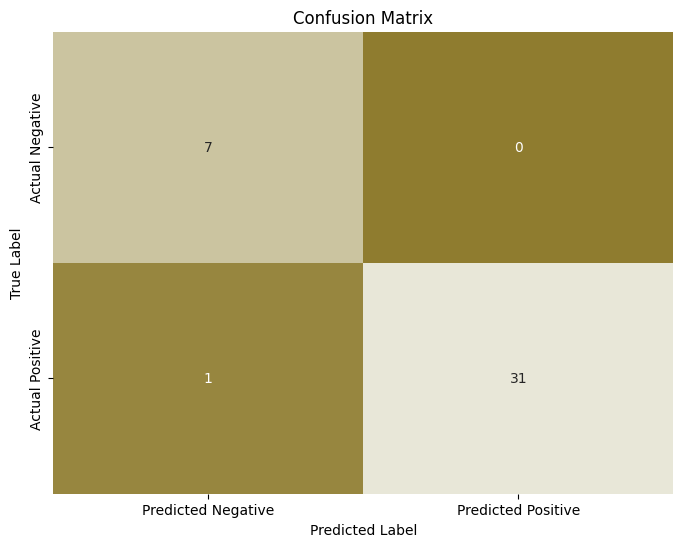

In [ ]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define custom colors for quadrants
colors = ['#8f7c2f','#E8E7D8', '#e8e7d8', '#E8E7D8']  # Repeat the colors to match quadrants 1 and 3, and 2 and 4

# Define the color map with specified colors
cmap = LinearSegmentedColormap.from_list("Custom", colors)

# Plot confusion matrix as heatmap with alternate colors in quadrants
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=cmap, cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


ROC Curve: Receiver Operating Characteristic (ROC) curves are used to visualize the trade-off between true positive rate and false positive rate.

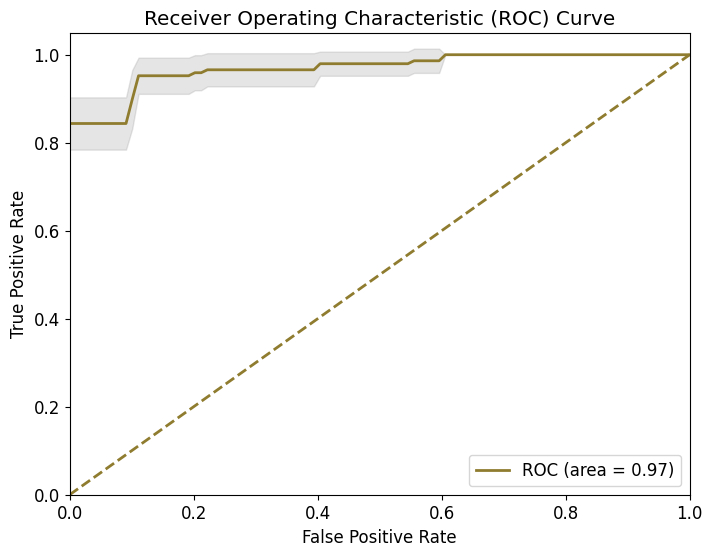

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import ADASYN

# Set global font size
plt.rcParams.update({'font.size': 12})

# Load the Parkinson's disease dataset
df = pd.read_csv('parkinsons.data')

# Separate features (X) and labels (Y)
features = df.loc[:, df.columns != 'status'].values[:, 1:]
labels = df.loc[:, 'status'].values

# Scale features using Min-Max scaling
scaler = MinMaxScaler((-1, 1))
X = scaler.fit_transform(features)
Y = labels

# Define the number of folds for cross-validation
n_folds = 5

# Create StratifiedKFold object
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=7)

# Initialize variables for ROC curve
mean_fpr = np.linspace(0, 1, 100)
tpr_list = []

# Loop through each fold
for train_index, test_index in skf.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

    # Apply ADASYN to handle class imbalance
    adasyn = ADASYN(sampling_strategy='minority', random_state=1)
    X_resampled, Y_resampled = adasyn.fit_resample(X_train, Y_train)

    # Create an XGBoost model for this fold
    model = XGBClassifier(eval_metric='logloss', use_label_encoder=False, objective='binary:logistic', n_estimators=100, max_depth=3)

    # Train the model on the resampled data
    model.fit(X_resampled, Y_resampled)

    # Get predicted probabilities
    Y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Compute ROC curve for this fold
    fpr, tpr, _ = roc_curve(Y_test, Y_pred_proba)
    tpr_list.append(np.interp(mean_fpr, fpr, tpr))

# Compute the mean and standard deviation of tpr across folds
tpr_mean = np.mean(tpr_list, axis=0)
tpr_std = np.std(tpr_list, axis=0)

# Compute AUC
roc_auc = auc(mean_fpr, tpr_mean)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(mean_fpr, tpr_mean, color='#8F7C2F', lw=2, label='ROC (area = {:.2f})'.format(roc_auc))
plt.fill_between(mean_fpr, tpr_mean - tpr_std, tpr_mean + tpr_std, color='grey', alpha=0.2)
plt.plot([0, 1], [0, 1], color='#8F7C2F', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


histogram

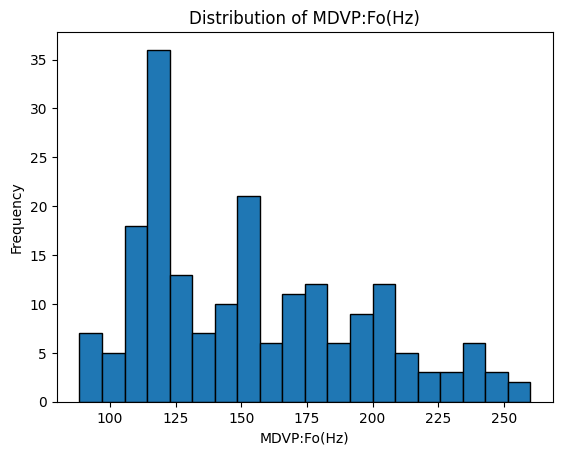

In [ ]:
import matplotlib.pyplot as plt

# Load the Parkinson's disease dataset
df = pd.read_csv('parkinsons.data')

# Choose a specific feature (e.g., "MDVP:Fo(Hz)")
feature_data = df['MDVP:Fo(Hz)']

# Create a histogram
plt.hist(feature_data, bins=20, edgecolor='k')  # You can adjust the number of bins
plt.xlabel('MDVP:Fo(Hz)')
plt.ylabel('Frequency')
plt.title('Distribution of MDVP:Fo(Hz)')
plt.show()
